<a href="https://colab.research.google.com/github/RepoRecipee/IIIT-PROJECTS-AND-LABS/blob/main/AIML_III_Module_3_Lab_2_Implementing_KNN_from_scratch_and_visualize_Algorithm_performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Students Internship Batch of 2024
# MODULE 3: CLASSIFICATION-1
# LAB-2 : Implementing KNN from scratch and visualize Algorithm performance

**Section 1: Implementing KNN**

In the last lab we had started discussing about KNN or K Nearest Neighbour method for clasification. We used the pre-built scikit-learn library for KNN. Now let's see how to implement this algorithm from scratch

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from collections import Counter

In [ ]:
def predict(X_train, y_train, X_test, k):
    distances = []
    targets = []

    for i in range(len(X_train)):
        # compute and store L2 distance
        distances.append([np.sqrt(np.sum(np.square(X_test - X_train[i, :]))), i])

    distances = sorted(distances)

    for i in range(k):
        index = distances[i][1]
        targets.append(y_train[index])

    # return most common target
    return Counter(targets).most_common(1)[0][0]

In [ ]:
def k_nearest_neighbor(X_train, y_train, X_test, k):

    assert k <= len(X_train), "[!] K cannot be larger than number of samples."

    # loop over all observations
    predictions = []
    for i in range(len(X_test)):
        predictions.append(predict(X_train, y_train, X_test[i, :], k))

    return np.asarray(predictions)

Note : If k = 1 then the algorithm will simply return the label of the nearest neighbour. When we give k > 1 the most common label out of the given labels in the k neighbours will be selected.The code for 1 NN is given as follows and does not have to be so complicated.

In [ ]:
def NN1(traindata, trainlabel, query):
  diff  = traindata - query  # find the difference between features. Numpy automatically takes care of the size here
  sq = diff*diff # square the differences
  dist = sq.sum(1) # add up the squares
  label = trainlabel[np.argmin(dist)] # our predicted label is the label of the training data which has the least distance from the query
  return label

In [ ]:
def Accuracy(gtlabel, predlabel):
  assert len(gtlabel)==len(predlabel), "Length of the groundtruth labels and predicted labels should be the same"
  correct = (gtlabel==predlabel).sum() # count the number of times the groundtruth label is equal to the predicted label.
  return correct/len(gtlabel)

Section 1.1 - Iris **Dataset**

Let's try it out on Iris Dataset present in the scikit learn library

In [ ]:
from sklearn.datasets import load_iris

data = load_iris()

df = pd.DataFrame(data=data.data, columns=data.feature_names)

df["target"] = data.target

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
X = np.array(df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']])
y = np.array(df['target'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=17)

In [ ]:
# Making our predictions
predictions = k_nearest_neighbor(X_train, y_train, X_test, 7)

# evaluating accuracy
accuracy = Accuracy(y_test, predictions)
print("The accuracy of our classifier is {} %".format(100*accuracy))

The accuracy of our classifier is 94.0 %


Now try out the sklearn implementation and compare your results.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

sklearn_knn = KNeighborsClassifier(n_neighbors=7)
sklearn_knn.fit(X_train,y_train)
sklearn_predictions = sklearn_knn.predict(X_test)
accuracy = accuracy_score(y_test, sklearn_predictions)
print("The accuracy of Sklearn classifier is {} %".format(100*accuracy))

The accuracy of Sklearn classifier is 94.0 %


# Section 1.2: Weighted NN

For KNN, If k is too small, the algorithm would be more sensitive to outliers. If k is too large, then the neighborhood may include too many points from other classes. We also take the label with max votes in the neighbourhood. Another choice can be that instead of giving equal weights to each of the neighbours we can give weighted points in the neighbourhood. So we weigh points by the inverse of their distance. Therefore, closer points will be given a higher priority as compared to the far off points.

An easy way to implement this is by specifying the 'weights' parameter as distance when defining the sklearn KNN function.

# TASK 1

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNeighborsClassifier with k=7
sklearn_knn = KNeighborsClassifier(n_neighbors=7)

# Fit the model with the training data
sklearn_knn.fit(X_train, y_train)

# Use kneighbors method to get the distances and indices of k-nearest neighbors
distances, indices = sklearn_knn.kneighbors(X_test)

# Retrieve the corresponding neighbors' labels
neighbors_labels = y_train[indices]

# Print the k-nearest neighbors along with their distances
for i, (dist, neighbors) in enumerate(zip(distances, neighbors_labels)):
    print(f"Test Point {i + 1}:")
    for j in range(len(neighbors)):
        print(f"Neighbor {j + 1}: Label = {neighbors[j]}, Distance = {dist[j]}")
    print("\n")


Test Point 1:
Neighbor 1: Label = 0, Distance = 0.3464101615137753
Neighbor 2: Label = 0, Distance = 0.3872983346207418
Neighbor 3: Label = 0, Distance = 0.41231056256176646
Neighbor 4: Label = 0, Distance = 0.4582575694955838
Neighbor 5: Label = 0, Distance = 0.45825756949558394
Neighbor 6: Label = 0, Distance = 0.46904157598234253
Neighbor 7: Label = 0, Distance = 0.47958315233127247


Test Point 2:
Neighbor 1: Label = 1, Distance = 0.19999999999999973
Neighbor 2: Label = 1, Distance = 0.24494897427831785
Neighbor 3: Label = 1, Distance = 0.33166247903553975
Neighbor 4: Label = 2, Distance = 0.4358898943540673
Neighbor 5: Label = 1, Distance = 0.48989794855663593
Neighbor 6: Label = 1, Distance = 0.5000000000000004
Neighbor 7: Label = 1, Distance = 0.5196152422706631


Test Point 3:
Neighbor 1: Label = 2, Distance = 0.24494897427831822
Neighbor 2: Label = 2, Distance = 0.3605551275463989
Neighbor 3: Label = 2, Distance = 0.360555127546399
Neighbor 4: Label = 2, Distance = 0.374165738

# Section 2: Visualizing Data

Voronoi Diagrams
In simple terms, Voronoi diagrams help you to visualize the dataset by partioning the plane into regions that are close to a given set of points. These regions are also called Voronoi cells.

Note that the cells/regions depend on the Distance metric being used. One way of interpreting this is by understanding that the distance metric decides the degree to which a 'point' or 'seed' in the Voronoi diagram has influence. For each seed there is a corresponding region, called a Voronoi cell, consisting of all points of the plane closer to that seed than to any other.

This link provides a wonderful illustration of Voronoi plots for 20 points in two cases: (1) Using Euclidean distance, and (2) Using Manhattan distance.

Since our Iris data is 4-dimensional (as it has 4 attributes), we need to convert into a form that can be represented in 2-D.

While there are methods to visualize data higher than 2-dimensions, that is beyond scope for now.

For simplicity, we just take the first two columns of the iris dataset attributes and observe the Voronoi diagram generated for that.
Alternatively, one can also perform PCA (Principal Component Analysis), to reduce the 4D data to just two dimensions.

Plotting Voronoi regions




In [ ]:
#@title Plotting Voronoi regions
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d

def voronoi_finite_polygons_2d(vor, radius=None):
    """
    Reconstruct infinite voronoi regions in a 2D diagram to finite
    regions.

    Parameters
    ----------
    vor : Voronoi
        Input diagram
    radius : float, optional
        Distance to 'points at infinity'.

    Returns
    -------
    regions : list of tuples
        Indices of vertices in each revised Voronoi regions.
    vertices : list of tuples
        Coordinates for revised Voronoi vertices. Same as coordinates
        of input vertices, with 'points at infinity' appended to the
        end.

    """

    if vor.points.shape[1] != 2:
        raise ValueError("Requires 2D input")

    new_regions = []
    new_vertices = vor.vertices.tolist()

    center = vor.points.mean(axis=0)
    if radius is None:
        radius = vor.points.ptp().max()

    # Construct a map containing all ridges for a given point
    all_ridges = {}
    for (p1, p2), (v1, v2) in zip(vor.ridge_points, vor.ridge_vertices):
        all_ridges.setdefault(p1, []).append((p2, v1, v2))
        all_ridges.setdefault(p2, []).append((p1, v1, v2))

    # Reconstruct infinite regions
    for p1, region in enumerate(vor.point_region):
        vertices = vor.regions[region]

        if all(v >= 0 for v in vertices):
            # finite region
            new_regions.append(vertices)
            continue

        # reconstruct a non-finite region
        ridges = all_ridges[p1]
        new_region = [v for v in vertices if v >= 0]

        for p2, v1, v2 in ridges:
            if v2 < 0:
                v1, v2 = v2, v1
            if v1 >= 0:
                # finite ridge: already in the region
                continue

            # Compute the missing endpoint of an infinite ridge

            t = vor.points[p2] - vor.points[p1] # tangent
            t /= np.linalg.norm(t)
            n = np.array([-t[1], t[0]])  # normal

            midpoint = vor.points[[p1, p2]].mean(axis=0)
            direction = np.sign(np.dot(midpoint - center, n)) * n
            far_point = vor.vertices[v2] + direction * radius

            new_region.append(len(new_vertices))
            new_vertices.append(far_point.tolist())

        # sort region counterclockwise
        vs = np.asarray([new_vertices[v] for v in new_region])
        c = vs.mean(axis=0)
        angles = np.arctan2(vs[:,1] - c[1], vs[:,0] - c[0])
        new_region = np.array(new_region)[np.argsort(angles)]

        # finish
        new_regions.append(new_region.tolist())

    return new_regions, np.asarray(new_vertices)

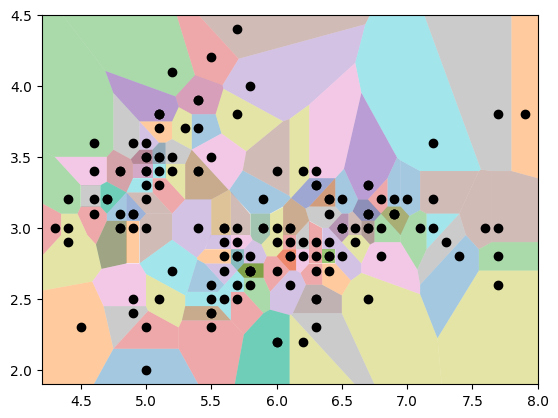

In [ ]:
## Plotting Voronoi regions for the Iris dataset

points = []
xpts = np.array(df['sepal length (cm)'])
ypts = np.array(df['sepal width (cm)'])
for i in range(len(xpts)):
  points.append([xpts[i],ypts[i]])
# print(points)
points = np.array(points)
# compute Voronoi tesselation
vor = Voronoi(points)

regions, vertices = voronoi_finite_polygons_2d(vor)

for region in regions:
    polygon = vertices[region]
    plt.fill(*zip(*polygon), alpha=0.4)

plt.plot(points[:,0], points[:,1], 'ko')
plt.xlim(vor.min_bound[0] - 0.1, vor.max_bound[0] + 0.1)
plt.ylim(vor.min_bound[1] - 0.1, vor.max_bound[1] + 0.1)

plt.show()

# Section 2.2: Understanding Decision Boundaries

Wouldn't it also be great to know how exactly these 'votes' or neighbours are decided through some kind of visualization?

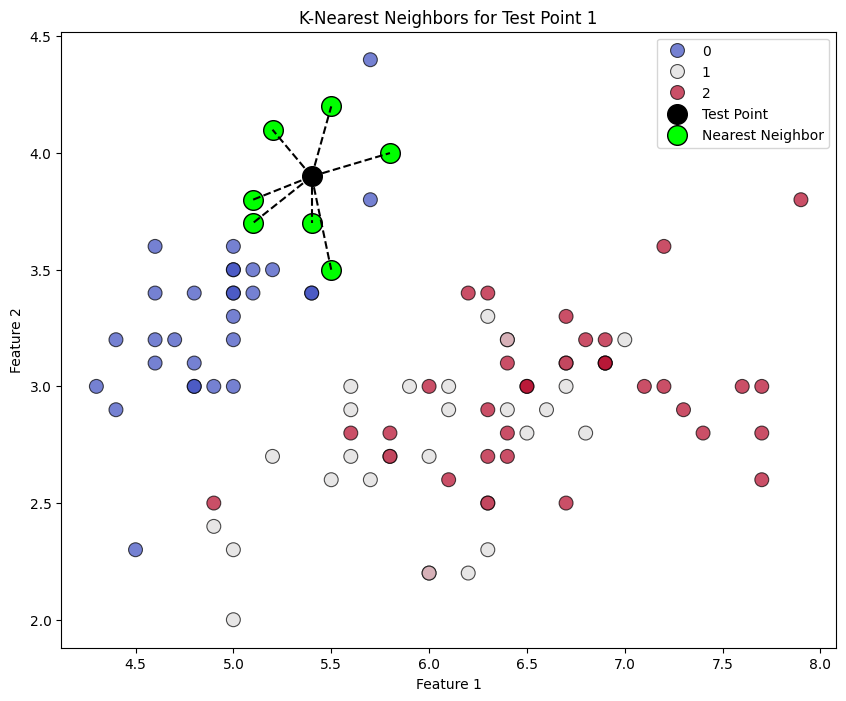

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Fit the KNN model (assuming it's already done)
sklearn_knn.fit(X_train, y_train)

# Use one test point for visualization
test_point_index = 0  # Change this index to visualize different test points
distances, indices = sklearn_knn.kneighbors([X_test[test_point_index]])

# Plot the training points
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=y_train, palette='coolwarm', s=100, edgecolor='k', alpha=0.7)

# Highlight the test point
plt.scatter(X_test[test_point_index, 0], X_test[test_point_index, 1], color='black', s=200, label='Test Point')

# Plot the K-nearest neighbors
for i in range(len(indices[0])):
    neighbor_index = indices[0][i]
    plt.scatter(X_train[neighbor_index, 0], X_train[neighbor_index, 1], color='lime', s=200, edgecolor='black', label='Nearest Neighbor' if i == 0 else "")

    # Draw lines between the test point and its neighbors
    plt.plot([X_test[test_point_index, 0], X_train[neighbor_index, 0]],
             [X_test[test_point_index, 1], X_train[neighbor_index, 1]], 'k--')

plt.legend()
plt.title(f"K-Nearest Neighbors for Test Point {test_point_index + 1}")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


**Decision Boundary**

In [ ]:
from matplotlib.colors import ListedColormap
import seaborn as sns


def decision_boundary_plot(x_dec,y_dec,k):
  h = .02  # step size in the mesh

  # Create color maps
  n = len(set(y_dec))
  cmap_light = ListedColormap(['pink', 'green', 'cyan','yellow'][:n])
  cmap_bold = ['pink', 'darkgreen', 'blue','yellow'][:n]

  for weights in ['uniform', 'distance']:
      # we create an instance of Neighbours Classifier and fit the data.
      clf = KNeighborsClassifier(n_neighbors=k, weights=weights)
      clf.fit(x_dec, y_dec)

      # Plot the decision boundary. For that, we will assign a color to each
      # point in the mesh [x_min, x_max]x[y_min, y_max].
      x_min, x_max = x_dec[:, 0].min() - 1, x_dec[:, 0].max() + 1
      y_min, y_max = x_dec[:, 1].min() - 1, x_dec[:, 1].max() + 1
      xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                          np.arange(y_min, y_max, h))
      Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

      # Put the result into a color plot
      Z = Z.reshape(xx.shape)
      plt.figure(figsize=(8, 6))
      plt.contourf(xx, yy, Z, cmap=cmap_light)

      # Plot also the training points
      sns.scatterplot(x=x_dec[:, 0], y=x_dec[:, 1], hue=y_dec,
                      palette=cmap_bold, alpha=1.0, edgecolor="black")
      plt.xlim(xx.min(), xx.max())
      plt.ylim(yy.min(), yy.max())
      plt.title("Multi-Classification (k = %i, weights = '%s')"% (k, weights))

  plt.show()


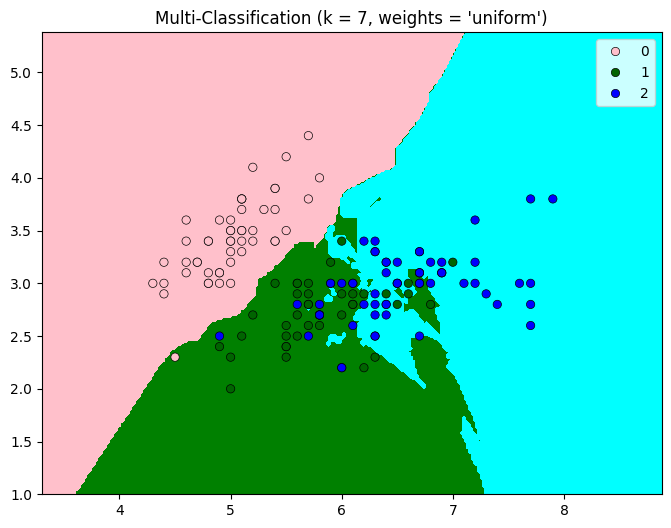

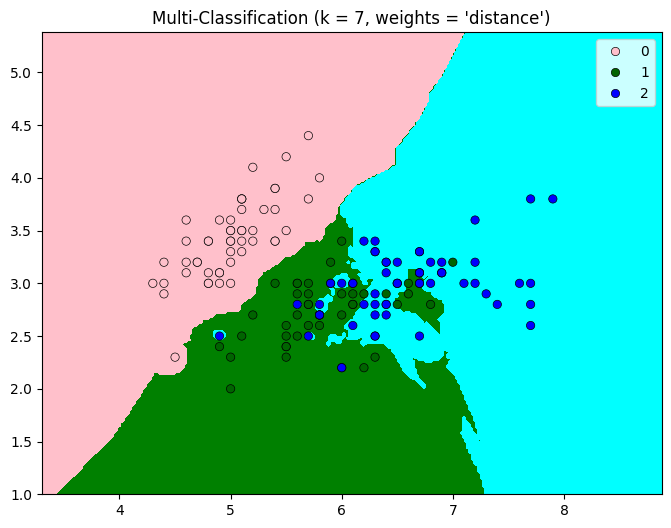

In [ ]:
x_pts = X[:,:2]
y_pts = y
decision_boundary_plot(x_pts,y_pts,7)

TASK-2
## In the above cells, we saw the Voronoi diagram of the data and plotted the KNN decision boundaries
## by only considering two attributes of the dataset. You must be already familiar with PCA.
## Apply PCA on the dataset above to reduce it to two dimensions.
### Plot the Voronoi diagram and Decision boundaries after that.

# 1. Apply PCA to Reduce the Dataset to Two Dimensions

In [ ]:
from sklearn.decomposition import PCA

# Assuming X_train is your dataset
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

# Now X_pca has only two dimensions


Plot the Voronoi Diagram and Decision Boundaries

<Figure size 800x600 with 0 Axes>

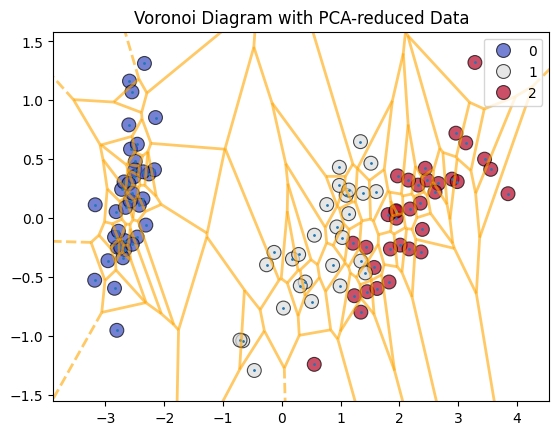

In [ ]:
from scipy.spatial import Voronoi, voronoi_plot_2d

def plot_voronoi(X_pca, y_train):
    # Compute Voronoi diagram
    vor = Voronoi(X_pca)

    # Plot the Voronoi diagram
    plt.figure(figsize=(8, 6))
    voronoi_plot_2d(vor, show_vertices=False, line_colors='orange', line_width=2, line_alpha=0.6, point_size=2)

    # Plot the points
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_train, palette='coolwarm', s=100, edgecolor='k', alpha=0.7)

    plt.title("Voronoi Diagram with PCA-reduced Data")
    plt.show()

# Apply the Voronoi plot
plot_voronoi(X_pca, y_train)


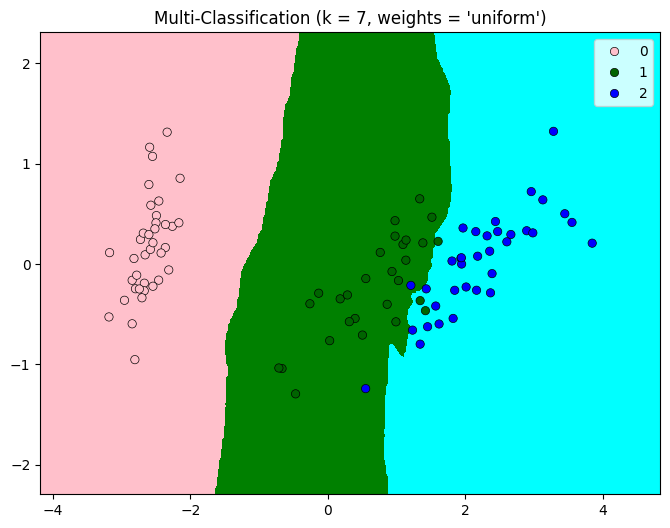

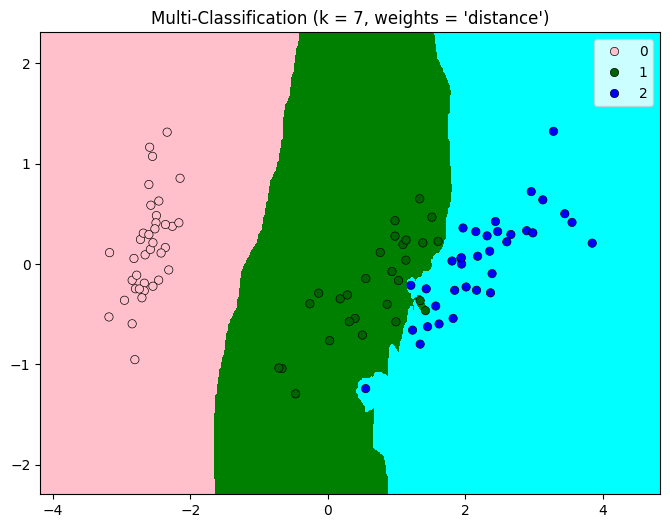

In [ ]:
decision_boundary_plot(X_pca, y_train, k=7)


# Section 2.3: Confusion Matrix

In classification problems, a confusion matrix, also known as an error matrix, is a table that allows visualization of the performance of an algorithm, typically a supervised learning one. Each row of the matrix represents the instances in an actual class while each column represents the instances in a predicted class.

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
# print(confusion_matrix(y_test,predictions))
pd.crosstab(y_test, predictions, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,2,All
True,,,,
0,13,0,0,13
1,0,22,0,22
2,0,3,12,15
All,13,25,12,50


Text(0.5, 23.52222222222222, 'Predicted label')

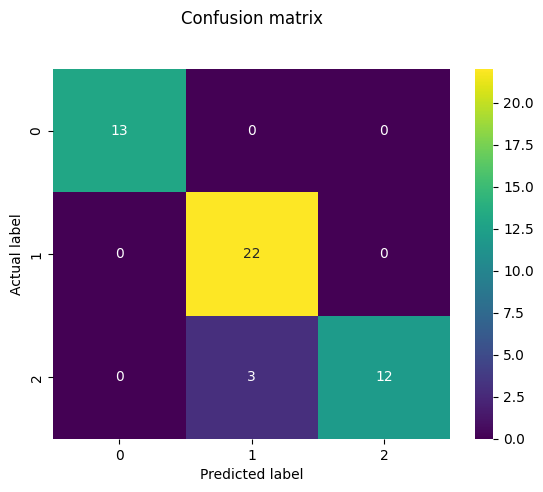

In [ ]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, predictions)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="viridis" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Section 2.4: Classification Report

Precision, Recall, and F1-Score are other metrics besides accuracy that one might look for in an algorithm. Depending on the use-case, one might consider one metric more important than the other.

Note: T-> True, F->False, P->Positive, N->Negative

Mathematically, Accuracy is :

Accuracy=TP+TNTP+TN+FP+FN

Precision: The accuracy of positive predictions

Precision=TPTP+FP

Recall:Fraction of positives that were correctly identified

Recall=TPTP+FN

F1-score: Harmonic mean of precision and recall

F1=2∗Precision∗RecallPrecision+Recall=2∗TP2∗TP+FP+FN

In [ ]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.88      1.00      0.94        22
           2       1.00      0.80      0.89        15

    accuracy                           0.94        50
   macro avg       0.96      0.93      0.94        50
weighted avg       0.95      0.94      0.94        50



# Car Evaluation Dataset

# TASK-3
## Plot a Confusion Matrix for the results of the Car evaluation dataset

In [16]:
# Upload the Car evaluation data CSV file that has been shared with you.
# Run this cell, click on the 'Choose files' button and upload the file.
from google.colab import files
uploaded = files.upload()

Saving car_evaluation (3).csv to car_evaluation (3).csv


In [18]:
car_df = pd.read_csv('car_evaluation (3).csv')
car_df

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [19]:
for x in car_df.columns:
  # print(x)
  le = preprocessing.LabelEncoder()
  le.fit(car_df[x])
  car_df[x]=le.transform(car_df[x])

car_df

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,3,3,0,0,2,2,2
1,3,3,0,0,2,0,2
2,3,3,0,0,1,1,2
3,3,3,0,0,1,2,2
4,3,3,0,0,1,0,2
...,...,...,...,...,...,...,...
1722,1,1,3,2,1,2,1
1723,1,1,3,2,1,0,3
1724,1,1,3,2,0,1,2
1725,1,1,3,2,0,2,1


In [20]:
dataset = car_df.values
X = dataset[:,0:6]
y = np.array(dataset[:,6])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

In [21]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
score = accuracy_score(y_test, predictions)
print("The accuracy of the classifier on Car evaluation dataset is {:.2f} %".format(100*score))

The accuracy of the classifier on Car evaluation dataset is 89.88 %


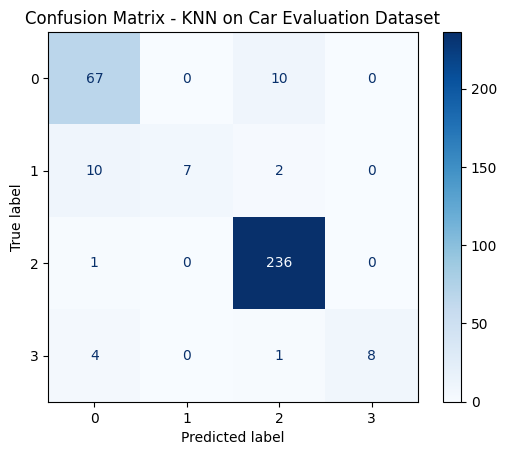

In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Step 1: Load the dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data'
columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
car_df = pd.read_csv(url, names=columns)

# Step 2: Preprocess the data
# Convert categorical variables to numerical values
car_df = car_df.apply(LabelEncoder().fit_transform)

# Step 3: Split data into features and target variable
dataset = car_df.values
X = dataset[:, 0:6]  # Features
y = np.array(dataset[:, 6])  # Target

# Step 4: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

# Step 5: Train the K-Nearest Neighbors (KNN) model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Step 6: Make predictions on the test set
predictions = knn.predict(X_test)

# Step 7: Generate and plot the confusion matrix
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - KNN on Car Evaluation Dataset')
plt.show()

## TASK-4
## Print a Classification Report for the results of the Car evaluation dataset

In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

# Step 1: Load the dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data'
columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
car_df = pd.read_csv(url, names=columns)

# Step 2: Preprocess the data
# Convert categorical variables to numerical values
car_df = car_df.apply(LabelEncoder().fit_transform)

# Step 3: Split data into features and target variable
dataset = car_df.values
X = dataset[:, 0:6]  # Features
y = np.array(dataset[:, 6])  # Target

# Step 4: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

# Step 5: Train the K-Nearest Neighbors (KNN) model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Step 6: Make predictions on the test set
predictions = knn.predict(X_test)

# Step 7: Print the classification report
report = classification_report(y_test, predictions, target_names=np.unique(y).astype(str))
print("Classification Report for KNN on Car Evaluation Dataset:\n")
print(report)


Classification Report for KNN on Car Evaluation Dataset:

              precision    recall  f1-score   support

           0       0.82      0.87      0.84        77
           1       1.00      0.37      0.54        19
           2       0.95      1.00      0.97       237
           3       1.00      0.62      0.76        13

    accuracy                           0.92       346
   macro avg       0.94      0.71      0.78       346
weighted avg       0.92      0.92      0.91       346



# TASK-5
## Plot the Decision boundary diagram for the classifier of the Car evaluation dataset

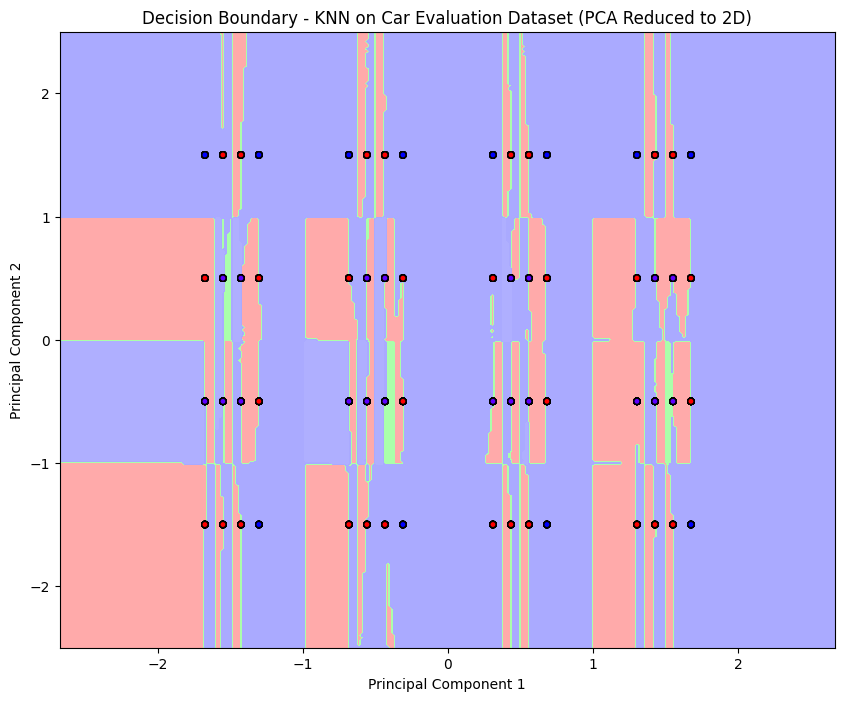

In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Step 1: Load the dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data'
columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
car_df = pd.read_csv(url, names=columns)

# Step 2: Preprocess the data
# Convert categorical variables to numerical values
car_df = car_df.apply(LabelEncoder().fit_transform)

# Step 3: Split data into features and target variable
X = car_df.iloc[:, 0:6].values  # Features
y = car_df.iloc[:, 6].values  # Target

# Step 4: Reduce the dimensionality to 2D using PCA
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# Step 5: Split the reduced dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=19)

# Step 6: Train the K-Nearest Neighbors (KNN) model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Step 7: Plot the decision boundary
h = .02  # step size in the mesh
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF', '#AFAFFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF', '#5F00FF'])

# Create a mesh grid
x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict the classifier for each point in the mesh grid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
plt.title('Decision Boundary - KNN on Car Evaluation Dataset (PCA Reduced to 2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


## TASK-6
## Plot the Voronoi diagram for the classifier of the Car evaluation dataset

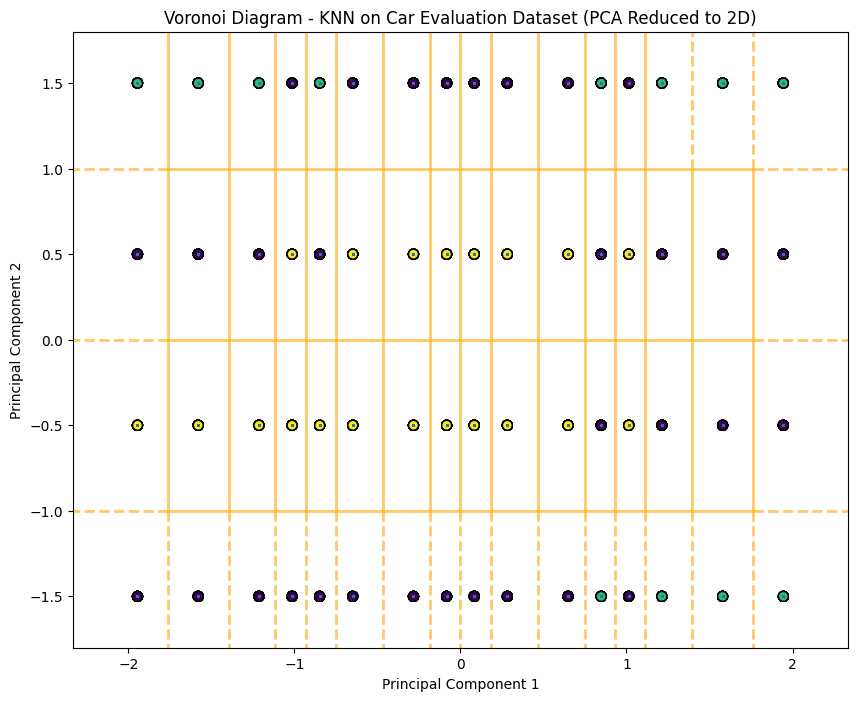

In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from scipy.spatial import Voronoi, voronoi_plot_2d
import matplotlib.pyplot as plt

# Step 1: Load the dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data'
columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
car_df = pd.read_csv(url, names=columns)

# Step 2: Preprocess the data
# Convert categorical variables to numerical values
car_df = car_df.apply(LabelEncoder().fit_transform)

# Step 3: Split data into features and target variable
X = car_df.iloc[:, 0:6].values  # Features
y = car_df.iloc[:, 6].values  # Target

# Step 4: Reduce the dimensionality to 2D using PCA
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# Step 5: Split the reduced dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=19)

# Step 6: Train the K-Nearest Neighbors (KNN) model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Step 7: Plot the Voronoi diagram
plt.figure(figsize=(10, 8))

# Create Voronoi diagram based on the reduced data
vor = Voronoi(X_reduced)

# Plot the Voronoi diagram
voronoi_plot_2d(vor, ax=plt.gca(), show_vertices=False, line_colors='orange', line_width=2, line_alpha=0.6, point_size=2)

# Scatter plot the data points with their class color
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)

plt.title('Voronoi Diagram - KNN on Car Evaluation Dataset (PCA Reduced to 2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
